# Long Run Analysis

In [94]:
prefix = 0

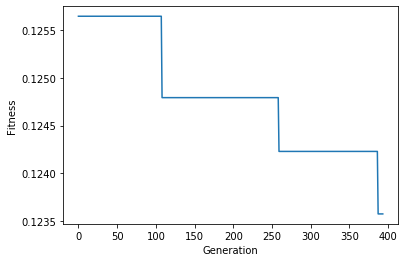

In [95]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from pathlib import Path

p = Path('.')
filenames = list(p.glob(f'{prefix}_*.output'))

fitness = []
pop = []
for filename in filenames:
    fid  = open(filename, 'r')
    lines = fid.readlines() 
    for line in lines:
        if 'BEST' in line:
            fitness.append(eval(line.split('-')[1]))
            pop.append(eval(line.split(' - ')[2]))
    
fitness = np.array(fitness)
fitness = list(fitness[:,0])
fitness.sort(reverse=True)
plt.plot(fitness)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.savefig(f'{filename}.png')


# if name == "__main__":
#     import fileinput

#     fid = fileinput.input()
#     for line in fileinput.input():
#     pass

In [96]:
from see import DataDownload as dd
imagefiles = []
maskfiles = []
outputfiles = []

print("Adding COSKEL Data")
files = dd.getCOSKELFolderlists(folder='./Image_Data/', outputfolder='./Image_Data/Output/')
imagefiles += files[0]
maskfiles += files[1]
outputfiles += files[2]

print("Adding Sky Data")
files = dd.getSkyFolderLists(folder='./Image_Data/', outputfolder='./Image_Data/Output/')
imagefiles += files[0]
maskfiles += files[1]
outputfiles += files[2]

Adding COSKEL Data
Adding Sky Data


trivial solution


Text(0.5, 1.0, '1')

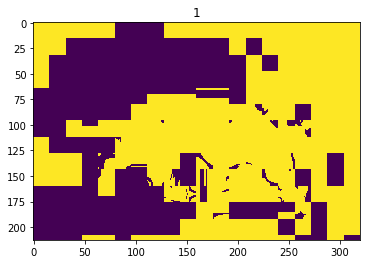

In [97]:
from see import Segmentors
import imageio

img = imageio.imread(imagefiles[prefix])
gmask = imageio.imread(maskfiles[prefix])
params = pop[-1]
seg = Segmentors.algoFromParams(params)
mask = seg.evaluate(img)
fitness,_,_ = Segmentors.FitnessFunction(mask,gmask)
plt.imshow(mask)
plt.title(fitness)

In [85]:
imagefiles

[]

In [62]:
!cat makefile
